# Predict post-operative life expectancy in the lung cancer patients using Machine Learning

## Problem Definition
Create a Classification model to predict post-operative life expectancy in lung cancer patients using Machine Learning

## Data
We have 18 attributes and 470 columns to predict our target variable.The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients after thoracic surgery in which there are two classes 
* class 1 - the death of patients within one year after surgery 
* class 2 – the patients who survive.
We have 18 attributes to predict our target variable

# Evaluation
If we can reach atleast 85% accuracy at predicting we'll pursure this project.

# Exploratory Data Analysis (EDA)
* Step 1: Importing the requred libraries
* Step 2: Loading the data & understanding of data columns
* Step 3: Basic understanding of the data
* Step 4: Preprocessing
    - checking & handling null values 
    - checking & handling duplicant in the data
    - checking & handling inconsistency or anomalies


In [1]:
#imorting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [3]:
# Loading data as csv
data=pd.read_csv("/kaggle/input/thoraric-surgery/ThoraricSurgery.csv")
data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [5]:
data.isnull().sum()

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

### As there are object dtypes attributes we should convert them to Numerical terms

In [6]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

DGN
PRE6
PRE7
PRE8
PRE9
PRE10
PRE11
PRE14
PRE17
PRE19
PRE25
PRE30
PRE32
Risk1Yr


In [7]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label]=pd.Categorical(content).codes + 1
    

In [8]:
data.dtypes

id           int64
DGN           int8
PRE4       float64
PRE5       float64
PRE6          int8
PRE7          int8
PRE8          int8
PRE9          int8
PRE10         int8
PRE11         int8
PRE14         int8
PRE17         int8
PRE19         int8
PRE25         int8
PRE30         int8
PRE32         int8
AGE          int64
Risk1Yr       int8
dtype: object

In [9]:
data["Risk1Yr"].value_counts()

Risk1Yr
1    400
2     70
Name: count, dtype: int64

In [10]:
data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2,2.88,2.16,2,1,1,1,2,2,4,1,1,1,2,1,60,1
1,2,3,3.40,1.88,1,1,1,1,1,1,2,1,1,1,2,1,51,1
2,3,3,2.76,2.08,2,1,1,1,2,1,1,1,1,1,2,1,59,1
3,4,3,3.68,3.04,1,1,1,1,1,1,1,1,1,1,1,1,54,1
4,5,3,2.44,0.96,3,1,2,1,2,2,1,1,1,1,2,1,73,2


### Now we can make a Visualization of AGE vs Risk1yr

In [11]:
df=pd.crosstab(data['AGE'],data['Risk1Yr'])

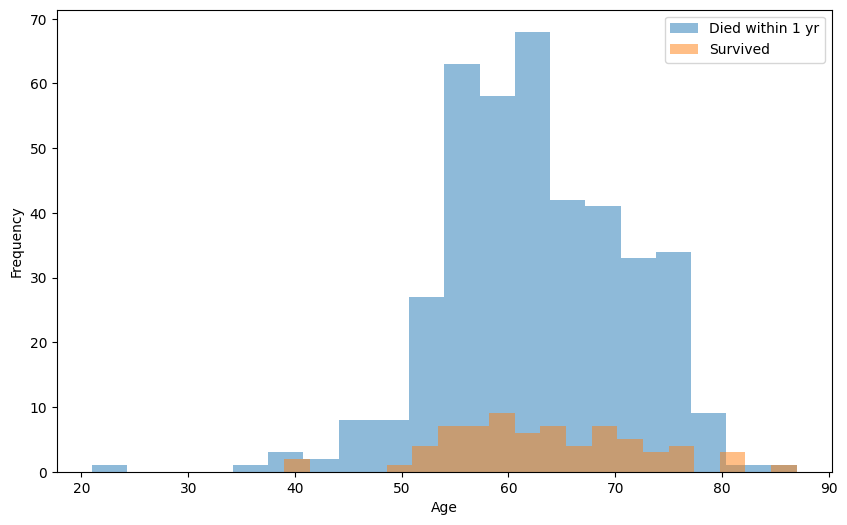

In [12]:
# Filter data based on DRK_YN values
R_1 = data[data['Risk1Yr'] == 1]
R_2 = data[data['Risk1Yr'] == 2]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(R_1['AGE'], bins=20, alpha=0.5, label='Died within 1 yr')
plt.hist(R_2['AGE'], bins=20, alpha=0.5, label="Survived")

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [13]:
data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2,2.88,2.16,2,1,1,1,2,2,4,1,1,1,2,1,60,1
1,2,3,3.40,1.88,1,1,1,1,1,1,2,1,1,1,2,1,51,1
2,3,3,2.76,2.08,2,1,1,1,2,1,1,1,1,1,2,1,59,1
3,4,3,3.68,3.04,1,1,1,1,1,1,1,1,1,1,1,1,54,1
4,5,3,2.44,0.96,3,1,2,1,2,2,1,1,1,1,2,1,73,2


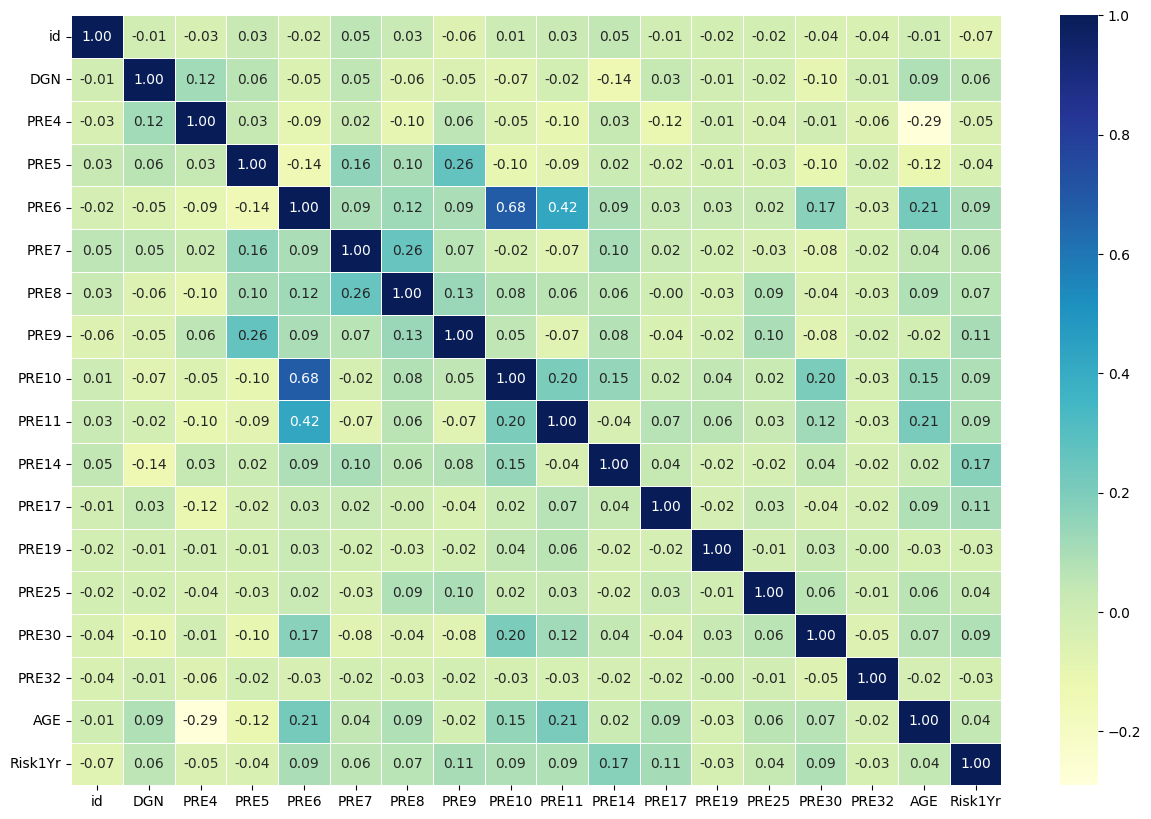

In [14]:
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [15]:
correlation_threshold = 0.1
features = []
for feature in corr_matrix.columns:
    if feature != 'Risk1Yr' and (corr_matrix[feature]['Risk1Yr'] > correlation_threshold or
                                corr_matrix[feature]['Risk1Yr'] < -correlation_threshold):
        features.append(feature)

print("Correlated features :")
print(features)

Correlated features :
['PRE9', 'PRE14', 'PRE17']


In [16]:
x=data.drop('Risk1Yr',axis=1)
y=data.Risk1Yr


In [17]:
np.random.seed(42)
#split into test and train
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

# Initialize and train a logistic regression model and SVC
lgr_model = LogisticRegression(max_iter=1000)  
lgr_model.fit(x_train, y_train)

svc_model = svm.LinearSVC(max_iter=1000)
svc_model.fit(x_train, y_train)

# Predict the target variable on the test set
y_pred_lgr = lgr_model.predict(x_test)

y_pred_svc = svc_model.predict(x_test)

# Calculate the accuracy of the models
accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", accuracy_lgr)
print("SVM Accuracy:", accuracy_svc)

Logistic Regression Accuracy: 0.7978723404255319
SVM Accuracy: 0.7978723404255319


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
print("precision_score: ", precision_score(y_test, y_pred_lgr))
print("f1_score: ", f1_score(y_test, y_pred_lgr))
print("recall_score: ", recall_score(y_test, y_pred_lgr))

precision_score:  0.7978723404255319
f1_score:  0.8875739644970414
recall_score:  1.0


In [19]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
score1=accuracy_score(y_test,y_pred)
score1

0.7978723404255319

## Hyper Parameter tuning (Using Grid search CV)

In [20]:
#We can Hyper tune the Logistic regression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Logictic Regression
lreg_gs=GridSearchCV(LogisticRegression(random_state=42),
                     log_reg_grid,
                      cv=5,
                    verbose=True,
                    )
lreg_gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [21]:
pred=lreg_gs.predict(x_test)
print("precision_score: ", precision_score(y_test, pred))
print("f1_score: ", f1_score(y_test, pred))

precision_score:  0.7978723404255319
f1_score:  0.8875739644970414


## Evaluating beyond Accuracy,precision,recall and f1
* AUC/ROC
* Classification Report
* COnfusion Matrix


In [22]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import recall_score,accuracy_score


In [23]:
y_preds=lreg_gs.predict(x_test)


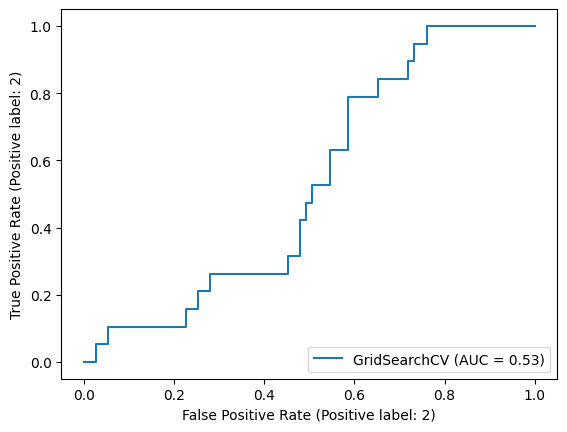

In [24]:
# Auc/Roc

RocCurveDisplay.from_estimator(lreg_gs, x_test, y_test)

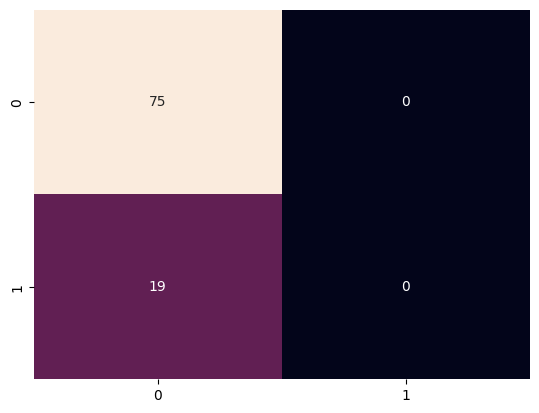

In [25]:
# Confusion matrix
cn=confusion_matrix(y_test,y_preds)
def plot_conf_mat(y_test,y_preds):
    fig, ax =plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    
plot_conf_mat(y_test,y_preds)


In [26]:
# Classification Report
clr=classification_report(y_test,y_preds,zero_division=1)
print(clr)

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        75
           2       1.00      0.00      0.00        19

    accuracy                           0.80        94
   macro avg       0.90      0.50      0.44        94
weighted avg       0.84      0.80      0.71        94

